#  Dictionary exploratory analisis
In order to know what to expect from data extraciton with o dictionary, some analysis have been done to describe the information present in it.

Here I present the preprocessed dictionary and some of its characteristics. The preprocessed dictionary is a csv file with a row for every word in the dictionary and ten columns, one for every sentiment/emotion. Every observation is marked with a 1 or a 0, that indicate weather the word evokes a certain emotion or not. 
This preprocessing also decreases filesize for the original [NRC-Emotion-Lexicon](http://www.saifmohammad.com/WebPages/ResearchInterests.html).

In [3]:
dict <- read.csv("dict.csv", row.names = 1, header = T)
names(dict)
head(dict)

[1] "anger"        "anticipation" "disgust"      "fear"         "joy"         
 [6] "negative"     "positive"     "sadness"      "surprise"     "trust"

,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
aback,0,0,0,0,0,0,0,0,0,0
abacus,0,0,0,0,0,0,0,0,0,1
abandon,0,0,0,1,0,1,0,1,0,0
abandoned,1,0,0,1,0,1,0,1,0,0
abandonment,1,0,0,1,0,1,0,1,1,0
abate,0,0,0,0,0,0,0,0,0,0


In [3]:
summary(dict)
nrow(dict)

     anger          anticipation        disgust             fear       
 Min.   :0.00000   Min.   :0.00000   Min.   :0.00000   Min.   :0.0000  
 1st Qu.:0.00000   1st Qu.:0.00000   1st Qu.:0.00000   1st Qu.:0.0000  
 Median :0.00000   Median :0.00000   Median :0.00000   Median :0.0000  
 Mean   :0.08793   Mean   :0.05916   Mean   :0.07461   Mean   :0.1041  
 3rd Qu.:0.00000   3rd Qu.:0.00000   3rd Qu.:0.00000   3rd Qu.:0.0000  
 Max.   :1.00000   Max.   :1.00000   Max.   :1.00000   Max.   :1.0000  
      joy             negative         positive        sadness       
 Min.   :0.00000   Min.   :0.0000   Min.   :0.000   Min.   :0.00000  
 1st Qu.:0.00000   1st Qu.:0.0000   1st Qu.:0.000   1st Qu.:0.00000  
 Median :0.00000   Median :0.0000   Median :0.000   Median :0.00000  
 Mean   :0.04859   Mean   :0.2344   Mean   :0.163   Mean   :0.08399  
 3rd Qu.:0.00000   3rd Qu.:0.0000   3rd Qu.:0.000   3rd Qu.:0.00000  
 Max.   :1.00000   Max.   :1.0000   Max.   :1.000   Max.   :1.00000  
    su

[1] 14181

### Total of emotions scored

In [4]:
colSums(dict)

anger anticipation      disgust         fear          joy     negative 
        1247          839         1058         1476          689         3324 
    positive      sadness     surprise        trust 
        2312         1191          534         1231

## Percentage of emotions apperance

In [5]:
colSums(dict)/nrow(dict)*100

anger anticipation      disgust         fear          joy     negative 
    8.793456     5.916367     7.460687    10.408293     4.858614    23.439814 
    positive      sadness     surprise        trust 
   16.303505     8.398561     3.765602     8.680629

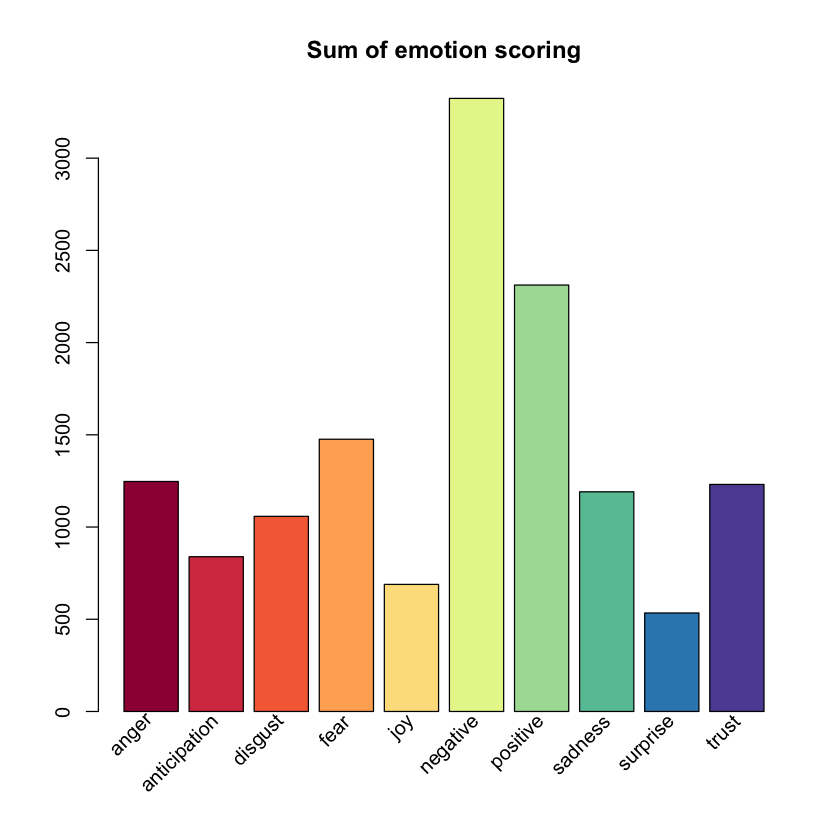

In [6]:
library(RColorBrewer)
bp <- barplot(colSums(dict), col = brewer.pal(10, "Spectral"), main = "Sum of emotion scoring", axes = F, axisnames = F)
text(bp, par("usr")[3] - 0.5, labels = names(dict), srt = 45, adj = 1, xpd = TRUE)
axis(2)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  534.0   893.8  1211.0  1390.0  1419.0  3324.0 

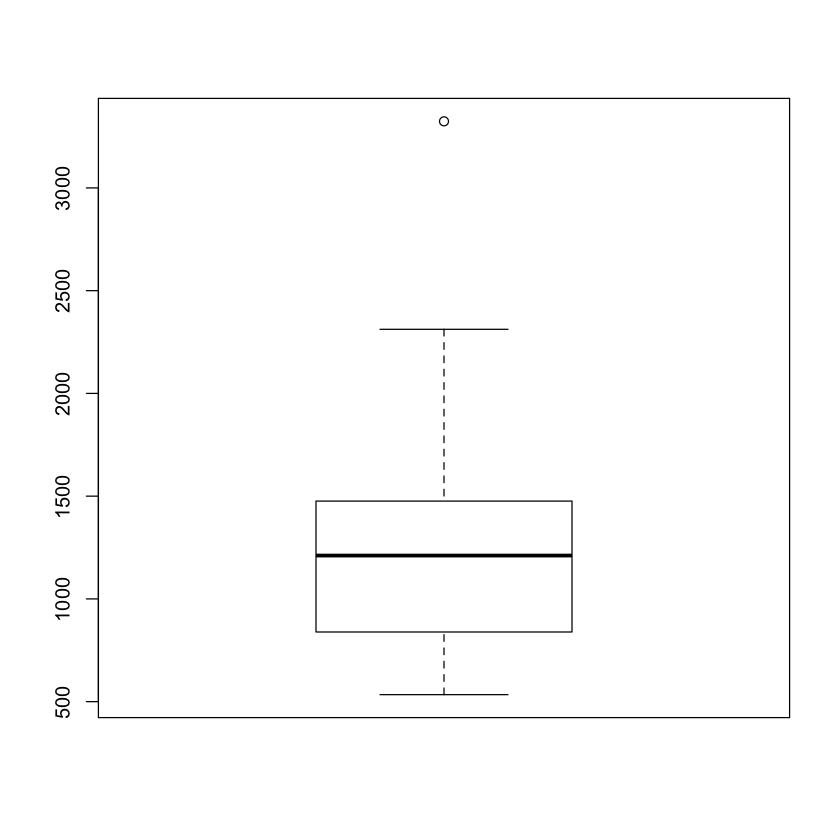

In [7]:
summary(colSums(dict))
boxplot(colSums(dict))

## Correlation matrix 
This matrix shows the correlation between every emotion. It is also shown with the help of a 

,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
anger,1.00000000,0.02345398,0.43209529,0.46821613,-0.02731684,0.50179909,-0.09727175,0.37280115,0.11385485,-0.05062900
anticipation,0.02345398,1.00000000,-0.01546466,0.07015346,0.44657268,-0.01387121,0.28012931,0.01566397,0.28953605,0.25920475
disgust,0.43209529,-0.01546466,1.00000000,0.33122289,-0.03920004,0.45804104,-0.10352236,0.33105103,0.05520777,-0.05513403
fear,0.46821613,0.07015346,0.33122289,1.00000000,-0.02332121,0.48244532,-0.08791913,0.44461839,0.16306100,-0.03947235
joy,-0.02731684,0.44657268,-0.03920004,-0.02332121,1.00000000,-0.09639269,0.50225049,-0.02349151,0.30333200,0.39396399
negative,0.50179909,-0.01387121,0.45804104,0.48244532,-0.09639269,1.00000000,-0.20770838,0.47401884,0.08205034,-0.12861892
positive,-0.09727175,0.28012931,-0.10352236,-0.08791913,0.50225049,-0.20770838,1.00000000,-0.09441034,0.13431503,0.44227451
sadness,0.37280115,0.01566397,0.33105103,0.44461839,-0.02349151,0.47401884,-0.09441034,1.00000000,0.08167057,-0.05181919
surprise,0.11385485,0.28953605,0.05520777,0.16306100,0.30333200,0.08205034,0.13431503,0.08167057,1.00000000,0.11662996
trust,-0.05062900,0.25920475,-0.05513403,-0.03947235,0.39396399,-0.12861892,0.44227451,-0.05181919,0.11662996,1.00000000


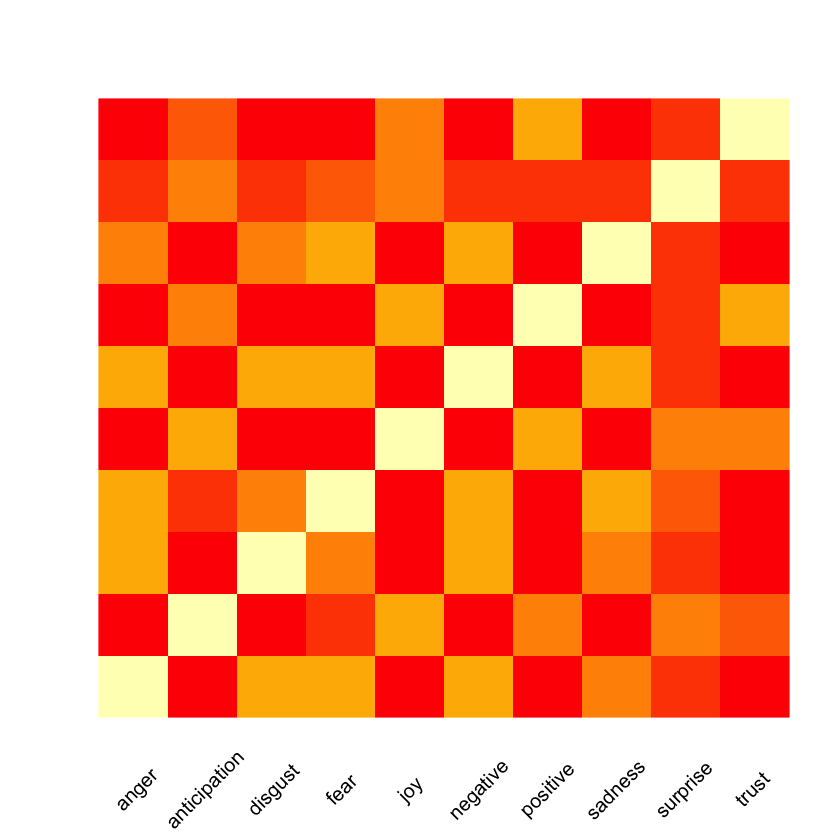

In [8]:
corm <- cor(dict)
corm
image(corm, axes = F, xlab="",ylab="",col = heat.colors(10))
axis(1, at=seq(0, 1, by=0.1), labels = FALSE, tick=F)
# axis(2, at=seq(0, 1, by=0.12), labels = FALSE, tick=F)
text(seq(0, 1, by=0.11), par("usr")[3] - 0.1, labels = names(dict), srt = 45, pos = 1, adj = 1, xpd = TRUE)

A heatmap with a correlation dendrogram can easily demonstrate how two major groups are created: One of positive emotions and one of negative emotions. 

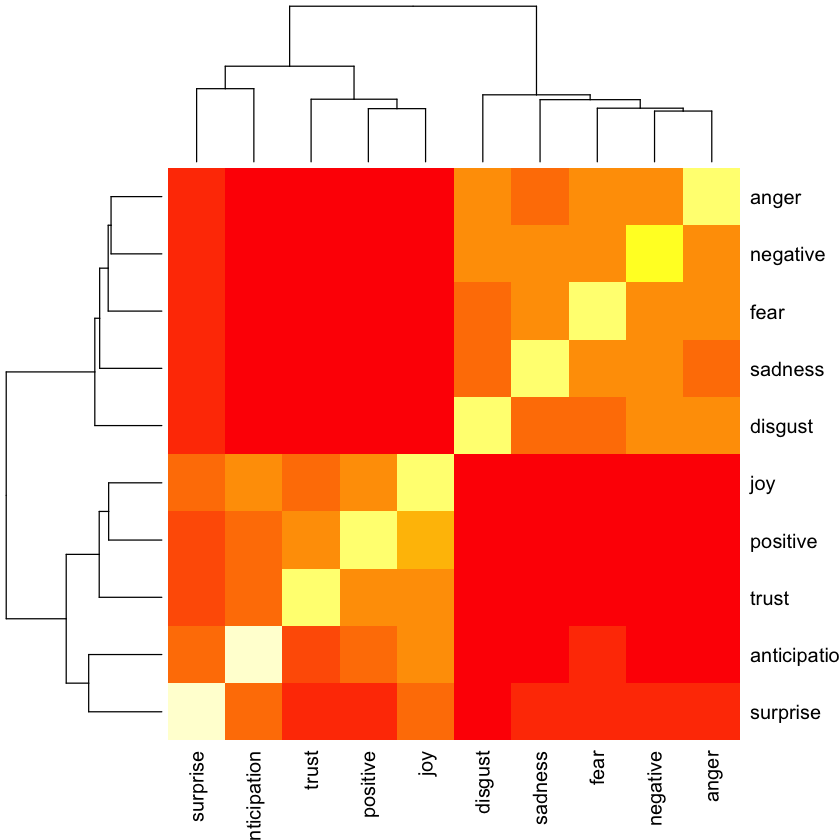

In [9]:
heatmap(cor(dict))

More detailed dendrogram:

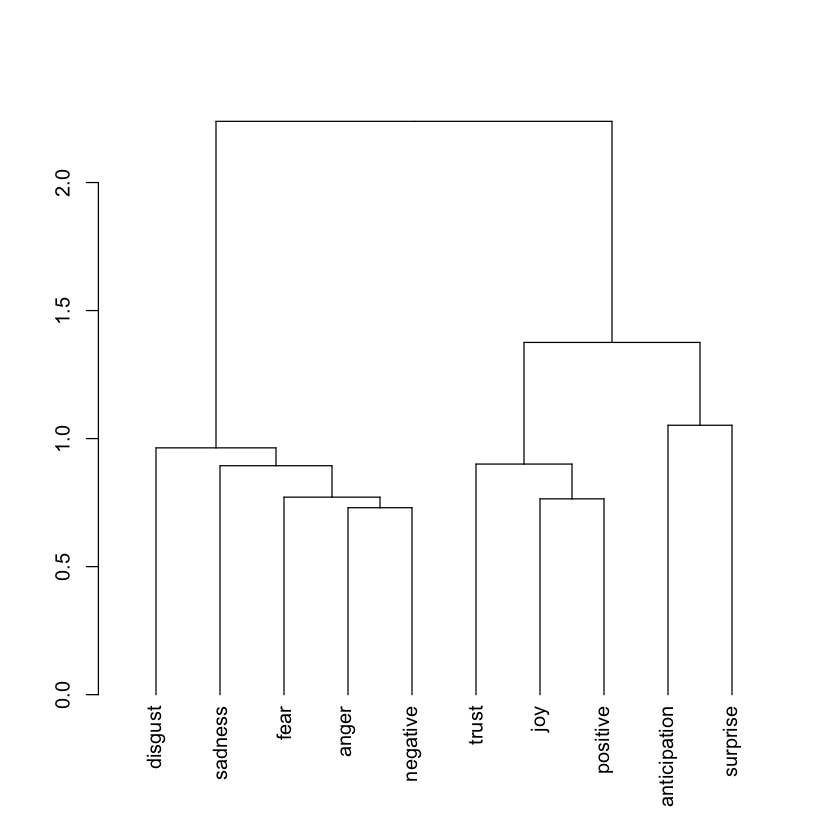

In [10]:
# dist(cor(dict))
plot(as.dendrogram(hclust(dist(cor(dict))))) # type = "triangle"

In [ ]:
# dist(as.matrix(dict))
# plot(as.dendrogram(hclust(dist(as.matrix(dict)))) # type = "triangle"
heatmap(as.matrix(dict)) # Stack overflow

In [12]:
dict[sample(nrow(dict), 20), ]

,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
trajectory,0,0,0,0,0,0,0,0,0,0
euthanasia,0,0,0,1,0,1,0,1,0,0
indivisible,0,0,0,0,0,0,0,0,0,1
disqualification,0,0,0,0,0,1,0,0,0,0
boundless,0,0,0,0,0,0,0,0,0,0
wintry,0,0,0,0,0,0,0,0,0,0
program,0,0,0,0,0,0,0,0,0,0
graduation,0,1,0,1,1,0,1,0,1,1
symptom,0,0,0,0,0,1,0,0,0,0
kangaroo,0,0,0,0,0,0,0,0,0,0


In [14]:
df <- data.frame()
for(i in names(dict)){
    print(i)
    df <- rbind(df, dict[sample(which(dict[i] > 0),10 ),])
    print(dict[sample(which(dict[i] > 0),10 ),])
}
head(df,80)
write.table(df, file = "sample.csv", sep = ",",
            eol = "\n", na = "NA", dec = ".", row.names = TRUE,
            col.names = TRUE, qmethod = c("escape", "double"),
            fileEncoding = "")

[1] "anger"
            anger anticipation disgust fear joy negative positive sadness
stalemate       1            0       1    0   0        0        0       0
bee             1            0       0    1   0        0        0       0
slash           1            0       0    0   0        0        0       0
horror          1            0       1    1   0        1        0       1
canker          1            0       1    0   0        1        0       0
eradicate       1            0       0    0   0        1        0       0
bark            1            0       0    0   0        1        0       0
commotion       1            0       0    0   0        1        0       0
hating          1            0       0    0   0        1        0       0
restitution     1            0       0    0   0        0        1       0
            surprise trust
stalemate          0     0
bee                0     0
slash              0     0
horror             1     0
canker             0     0
eradicate   

,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
perpetrator,1,0,1,1,0,1,0,1,0,0
outrage,1,0,1,0,0,1,0,0,0,0
damage,1,0,1,0,0,1,0,1,0,0
unlawful,1,0,1,1,0,1,0,1,0,0
battled,1,0,0,1,0,1,0,1,0,0
yell,1,0,0,1,0,1,0,0,1,0
agony,1,0,0,1,0,1,0,1,0,0
gall,1,0,1,0,0,1,0,0,0,0
infidel,1,0,1,1,0,1,0,0,0,0
indignation,1,0,1,0,0,1,0,0,0,0
